### Import Libraries

In [185]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import datapane as dp 

In [186]:
#connecting to datapane
!datapane login --server=https://datapane.com/ --token=<r00000df>

Connected successfully to https://datapane.com as victor6


In [187]:
#storing charts for reporting
figs = []

#### loading data

In [188]:
employees_data = pd.read_csv('Employees.csv')

In [189]:
employees_data.head()

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,PostalCode,Country,HomePhone,Extension
0,1,Davolio,Nancy,Sales Representative,Ms.,00:00.0,00:00.0,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,00:00.0,00:00.0,908 W. Capital Way,Tacoma,98401,USA,(206) 555-9482,3457
2,3,Leverling,Janet,Sales Representative,Ms.,00:00.0,00:00.0,722 Moss Bay Blvd.,Kirkland,98033,USA,(206) 555-3412,3355
3,4,Peacock,Margaret,Sales Representative,Mrs.,00:00.0,00:00.0,4110 Old Redmond Rd.,Redmond,98052,USA,(206) 555-8122,5176
4,5,Buchanan,Steven,Sales Manager,Mr.,00:00.0,00:00.0,14 Garrett Hill,London,SW1 8JR,UK,(71) 555-4848,3453


In [190]:
orders_data = pd.read_csv('orders.csv')
orders_data.head().append(orders_data.tail())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,EmployeeID,Unnamed: 22
0,1,CA-2017-152156,11/8/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,5,NaN
1,2,CA-2017-152156,11/8/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1,NaN
2,3,CA-2017-138688,6/12/2017,6/16/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7,NaN
3,4,US-2016-108966,10/11/2016,10/18/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,9,NaN
4,5,US-2016-108966,10/11/2016,10/18/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,6,NaN
9989,9990,CA-2015-110422,1/21/2015,1/23/2015,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,4,NaN
9990,9991,CA-2018-121258,2/26/2018,3/3/2018,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,4,NaN
9991,9992,CA-2018-121258,2/26/2018,3/3/2018,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,3,NaN
9992,9993,CA-2018-121258,2/26/2018,3/3/2018,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,3,NaN
9993,9994,CA-2018-119914,5/4/2018,5/9/2018,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.1600,2,0.00,72.9480,1,NaN


#### Merge Csv files based on employeeId

In [191]:
merged_data = employees_data.merge(orders_data,on=["EmployeeID"], copy=False, sort=True)
merged_data.describe()

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22
count,9994.000000,9994.000000,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000,0.0
mean,4.873224,2731.855513,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896,NaN
std,2.448598,1827.818526,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108,NaN
min,1.000000,428.000000,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,NaN
25%,3.000000,465.000000,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,NaN
50%,5.000000,3355.000000,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500,NaN
75%,7.000000,3457.000000,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,NaN
max,9.000000,5467.000000,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,NaN


#### Reset the index of merged data

In [192]:
reset_data = merged_data.reset_index()

In [193]:
reset_data.head()

,index,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City_x,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 22
0,0,1,Davolio,Nancy,Sales Representative,Ms.,00:00.0,00:00.0,507 - 20th Ave. E.,Seattle,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,NaN
1,1,1,Davolio,Nancy,Sales Representative,Ms.,00:00.0,00:00.0,507 - 20th Ave. E.,Seattle,...,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.88,6,0.0,13.3176,NaN
2,2,1,Davolio,Nancy,Sales Representative,Ms.,00:00.0,00:00.0,507 - 20th Ave. E.,Seattle,...,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.48,3,0.2,16.0110,NaN
3,3,1,Davolio,Nancy,Sales Representative,Ms.,00:00.0,00:00.0,507 - 20th Ave. E.,Seattle,...,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.72,4,0.2,7.3840,NaN
4,4,1,Davolio,Nancy,Sales Representative,Ms.,00:00.0,00:00.0,507 - 20th Ave. E.,Seattle,...,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.46,7,0.0,5.0596,NaN


In [194]:
#checking for missing values. if the whole column is empty column is dropped
reset_data.isna().sum()

index                 0
EmployeeID            0
LastName              0
FirstName             0
Title                 0
TitleOfCourtesy       0
BirthDate             0
HireDate              0
Address               0
City_x                0
PostalCode            0
Country_x             0
HomePhone             0
Extension             0
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Country_y             0
City_y                0
State                 0
Postal Code          11
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Unnamed: 22        9994
dtype: int64

In [195]:
#dropping empty tables
#dropping a column use 1 and row use 0
reset_data.drop(['Unnamed: 22'], axis = 1, inplace = True)

In [196]:
#replace empty postal code column with most appeared value
x = reset_data["Postal Code"].mode()[0]

reset_data["Postal Code"].fillna(x, inplace = True)

#### Remove Duplicate Rows

In [197]:
#check for duplicates
reset_data.duplicated()
reset_data.drop_duplicates(inplace=True)

#### Updating data types of each column

In [198]:
reset_data.BirthDate = reset_data.BirthDate.astype('datetime64[ns]')
reset_data.HireDate = reset_data.HireDate.astype('datetime64[ns]')
reset_data['Order Date'] = reset_data['Order Date'].astype('datetime64[ns]')
reset_data['Ship Date'] = reset_data['Ship Date'].astype('datetime64[ns]')
reset_data['LastName'] = reset_data['LastName'].astype('string')

In [199]:
convert_dict = {'FirstName': 'string',
                'Title': 'string',
                'TitleOfCourtesy': 'string',
                'Address': 'string',
                'City_x': 'string',
                'PostalCode': 'string',
                'Country_x': 'string',
                'HomePhone': 'string',
                'Order ID': 'string',
                'Ship Mode': 'string',
                'Customer ID': 'string',
                'Customer Name': 'string',
                'Segment': 'string',
                'Country_y': 'string',
                'City_y': 'string',
                'State': 'string',
                'Postal Code': 'string',
                'Region': 'string',
                'Product ID': 'string',
                'Category': 'string',
                'Sub-Category': 'string',
                'Product Name': 'string',
               }
  
reset_data = reset_data.astype(convert_dict)

#reset_data = reset_data.infer_objects()

In [200]:
reset_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            9994 non-null   int64         
 1   EmployeeID       9994 non-null   int64         
 2   LastName         9994 non-null   string        
 3   FirstName        9994 non-null   string        
 4   Title            9994 non-null   string        
 5   TitleOfCourtesy  9994 non-null   string        
 6   BirthDate        9994 non-null   datetime64[ns]
 7   HireDate         9994 non-null   datetime64[ns]
 8   Address          9994 non-null   string        
 9   City_x           9994 non-null   string        
 10  PostalCode       9994 non-null   string        
 11  Country_x        9994 non-null   string        
 12  HomePhone        9994 non-null   string        
 13  Extension        9994 non-null   int64         
 14  Row ID           9994 non-null   int64  

In [201]:
clean_data = reset_data
clean_data.head()

figs.append(dp.Table(clean_data.head()))

### 1. •	Calculate the number of days to ship an order 

In [202]:
clean_data['No days of shipment'] = clean_data['Ship Date'] - clean_data['Order Date']

In [203]:

clean_data.head()

,index,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City_x,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,No days of shipment
0,0,1,Davolio,Nancy,Sales Representative,Ms.,2021-12-02,2021-12-02,507 - 20th Ave. E.,Seattle,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,3 days
1,1,1,Davolio,Nancy,Sales Representative,Ms.,2021-12-02,2021-12-02,507 - 20th Ave. E.,Seattle,...,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.88,6,0.0,13.3176,7 days
2,2,1,Davolio,Nancy,Sales Representative,Ms.,2021-12-02,2021-12-02,507 - 20th Ave. E.,Seattle,...,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.48,3,0.2,16.0110,5 days
3,3,1,Davolio,Nancy,Sales Representative,Ms.,2021-12-02,2021-12-02,507 - 20th Ave. E.,Seattle,...,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.72,4,0.2,7.3840,5 days
4,4,1,Davolio,Nancy,Sales Representative,Ms.,2021-12-02,2021-12-02,507 - 20th Ave. E.,Seattle,...,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.46,7,0.0,5.0596,4 days


### Providing of all numeric columns with statistic description (e.g., mean, min, max, standard deviation, count, etc.) 
#### (i.e., Sales, Profits, Quantity, and Discount) 

In [204]:
def get_stats(cols):
    return clean_data[cols].mean(), clean_data[cols].min(), clean_data[cols].max(), clean_data[cols].std(), clean_data[cols].count(),    

In [205]:
cols = ['Sales', 'Profit', 'Quantity', 'Discount']

for col in cols:
    stats = get_stats(col)
    print("Column: {} - Mean: {} | Min: {} | Max: {} | Standard deviation: {} | Count: {}".format(col, stats[0], stats[1], stats[2], stats[3], stats[4]))


Column: Sales - Mean: 229.85800083049375 | Min: 0.444 | Max: 22638.48 | Standard deviation: 623.2451005086831 | Count: 9994
Column: Profit - Mean: 28.656896307784635 | Min: -6599.978 | Max: 8399.976 | Standard deviation: 234.26010769095734 | Count: 9994
Column: Quantity - Mean: 3.789573744246548 | Min: 1 | Max: 14 | Standard deviation: 2.2251096911414194 | Count: 9994
Column: Discount - Mean: 0.15620272163298948 | Min: 0.0 | Max: 0.8 | Standard deviation: 0.20645196782569744 | Count: 9994


### Correlation Matrix 

In [206]:
clean_data.corr()

,index,EmployeeID,Extension,Row ID,Sales,Quantity,Discount,Profit
index,1.000000,0.992036,-0.762937,0.101695,0.009281,0.001620,0.003539,0.011326
EmployeeID,0.992036,1.000000,-0.776469,-0.015789,0.009108,0.002101,0.001451,0.009570
Extension,-0.762937,-0.776469,1.000000,0.018803,-0.005100,-0.000232,0.003048,-0.006775
Row ID,0.101695,-0.015789,0.018803,1.000000,-0.001359,-0.004016,0.013480,0.012497
Sales,0.009281,0.009108,-0.005100,-0.001359,1.000000,0.200795,-0.028190,0.479064
Quantity,0.001620,0.002101,-0.000232,-0.004016,0.200795,1.000000,0.008623,0.066253
Discount,0.003539,0.001451,0.003048,0.013480,-0.028190,0.008623,1.000000,-0.219487
Profit,0.011326,0.009570,-0.006775,0.012497,0.479064,0.066253,-0.219487,1.000000


In [207]:
import seaborn as sn

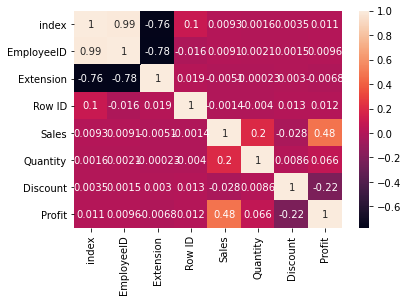

In [208]:
plt = sn.heatmap(clean_data.corr(), annot=True)

In [209]:
figs.append(dp.Plot(plt))

### Data Visualization 

In [210]:
clean_data.head()

,index,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City_x,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,No days of shipment
0,0,1,Davolio,Nancy,Sales Representative,Ms.,2021-12-02,2021-12-02,507 - 20th Ave. E.,Seattle,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,3 days
1,1,1,Davolio,Nancy,Sales Representative,Ms.,2021-12-02,2021-12-02,507 - 20th Ave. E.,Seattle,...,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.88,6,0.0,13.3176,7 days
2,2,1,Davolio,Nancy,Sales Representative,Ms.,2021-12-02,2021-12-02,507 - 20th Ave. E.,Seattle,...,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.48,3,0.2,16.0110,5 days
3,3,1,Davolio,Nancy,Sales Representative,Ms.,2021-12-02,2021-12-02,507 - 20th Ave. E.,Seattle,...,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.72,4,0.2,7.3840,5 days
4,4,1,Davolio,Nancy,Sales Representative,Ms.,2021-12-02,2021-12-02,507 - 20th Ave. E.,Seattle,...,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.46,7,0.0,5.0596,4 days


#### •	Create a bar plot that shows total sales per sub-category 

In [211]:
total_sales = clean_data.groupby(by='Sub-Category').sum().reset_index().sort_values(by='Sub-Category', ascending=False).reset_index(drop=True)

In [212]:
print(total_sales)

   Sub-Category    index  EmployeeID  Extension   Row ID        Sales  \
0        Tables  1523247        1495     884938  1572664  206965.5320   
1      Supplies   952081         925     522897   993554   46673.5380   
2       Storage  4330721        4223    2227764  4126649  223843.6080   
3        Phones  4478312        4368    2455706  4395985  330007.0540   
4         Paper  6773698        6619    3757545  6886090   78479.2060   
5      Machines   607391         589     310595   561428  189238.6310   
6        Labels  1772147        1734    1020248  1817254   12486.3120   
7   Furnishings  4815359        4689    2591450  4842624   91705.1640   
8     Fasteners  1102645        1077     590229  1017287    3024.2800   
9     Envelopes  1382228        1340     628294  1207903   16476.4020   
10      Copiers   369679         354     181257   355661  149528.0300   
11       Chairs  3142251        3054    1672799  3121503  328449.1030   
12    Bookcases  1070071        1051     645534  11

In [213]:
fig1 = px.bar(total_sales,
            x='Sub-Category',
            y='Sales',
            labels={'Sub-Category': 'Sub Category'},
             title='Total sales per sub category ')

fig1

In [214]:
figs.append(dp.Plot(fig1))

#### •	Create a bar plot that shows total sales per state 

In [215]:
total_sales_by_states = clean_data.groupby(by='State').sum().reset_index().sort_values(by='State', ascending=False).reset_index(drop=True)

print(total_sales_by_states)

                   State    index  EmployeeID  Extension    Row ID  \
0                Wyoming     5128           5       3453      5870   
1              Wisconsin   516116         505     315880    570981   
2          West Virginia    27999          25       4811     33175   
3             Washington  2600447        2520    1371556   2584458   
4               Virginia  1091348        1062     601248   1218137   
5                Vermont    67519          61      25257     91049   
6                   Utah   238758         243     154528    193525   
7                  Texas  5086689        4928    2604054   5085541   
8              Tennessee   885301         850     551011   1068141   
9           South Dakota    54509          55      32705     48858   
10        South Carolina   251921         242      89399    194095   
11          Rhode Island   303513         291     154351    305385   
12          Pennsylvania  2926470        2868    1652234   2768523   
13                Or

In [216]:
fig2 = px.bar(total_sales_by_states,
            x='State',
            y='Sales',
            labels={'State': 'States'},
             title='Total Sales by State ')

fig2

In [217]:
figs.append(dp.Plot(fig2))

#### histogram of Quantity 

In [218]:
fig3 = px.histogram(clean_data, x="Quantity", title='histogram of Item Quantities')

fig3.show()

In [219]:
figs.append(dp.Plot(fig3))

#### total sales change over time 

In [220]:
total_sales_by_order_dates = clean_data.groupby(by='Order Date').sum().reset_index().sort_values(by='Order Date', ascending=False).reset_index(drop=True)

fig4 = px.line(total_sales_by_order_dates,
                          x='Order Date',
                          y='Sales',
                          labels={'Sales': 'Item Sales'},
                          title='Total sales change over time ')

fig4.show()

In [221]:
figs.append(dp.Plot(fig4))

In [222]:
#### Stacked Chart for items order date to the shipment date

In [223]:
fig5 = px.bar(clean_data, x="State", y="Sales", color="Sub-Category",
            hover_data=['Category'], barmode = 'stack', title='Item sales by Category and Sub Category')
 
fig5.show()

In [224]:
figs.append(dp.Plot(fig5))

In [225]:
dp.Report(*figs).upload(name="Marketing analysis")

Uploading report and associated data - *please wait...*

Report successfully uploaded, click [here](https://datapane.com/u/victor6/reports/dA9bKE3/marketing-analysis/) to view and share your report.